In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car_prices_3_cleaned2.csv')

In [3]:
data.head()

,COMPANY,MODEL,TYPE,SIZE,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale Day,Sale month,Sale year,price_category
0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,2014.0,Bardzo drogie
1,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,2014.0,Bardzo drogie
2,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,2015.0,Bardzo drogie
3,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,2015.0,Bardzo drogie
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,2014.0,Bardzo drogie


In [4]:
data_cars = data.drop('mmr', axis=1)
data_cars.head()

,COMPANY,MODEL,TYPE,SIZE,transmission,state,condition,odometer,color,interior,seller,sellingprice,sale Day,Sale month,Sale year,price_category
0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,21500.0,Tue,Dec,2014.0,Bardzo drogie
1,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,21500.0,Tue,Dec,2014.0,Bardzo drogie
2,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),30000.0,Thu,Jan,2015.0,Bardzo drogie
3,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27750.0,Thu,Jan,2015.0,Bardzo drogie
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),67000.0,Thu,Dec,2014.0,Bardzo drogie


In [5]:
sample_size = int(len(data_cars) * 0.10)
sample = data_cars.sample(n=sample_size, replace=False)
print(sample)

           COMPANY          MODEL     TYPE       SIZE transmission state  \
369982        Ford         Escape  Limited        suv    automatic    fl   
150501       Dodge        Journey      SXT        SUV    automatic    wi   
133147   Chevrolet  Express Cargo     1500        Van    automatic    ca   
267050      Nissan     Versa Note   1.6 SV  Hatchback    automatic    ga   
262031       Dodge  Grand Caravan      SXT    Minivan    automatic    mn   
...            ...            ...      ...        ...          ...   ...   
411322   Chevrolet         Malibu       LT      sedan    automatic    sc   
279543       Buick       LaCrosse       CX      Sedan    automatic    fl   
185556         GMC    Sierra 1500      SLE   Crew Cab    automatic    tn   
374519  Volkswagen          Jetta  SE PZEV      sedan    automatic    nc   
292266       Honda          Civic       EX      Coupe       manual    ma   

        condition  odometer   color interior  \
369982       25.0   88810.0    gold    

In [8]:
X = pd.get_dummies(sample.drop(['price_category'], axis=1))
y = sample['price_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
las = RandomForestClassifier(n_estimators=100, random_state=1)
las.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [11]:
from sklearn.metrics import accuracy_score

y_pred = las.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Dokładność predykcji:', accuracy)

Dokładność predykcji: 0.9212079927338783


In [12]:
scores_ = cross_val_score(las, X, y, cv=5)

print('Dokładność predykcji:', scores_)
print('Średnia dokładność:', scores_.mean())

Dokładność predykcji: [0.92495459 0.92211626 0.92302452 0.92790645 0.93596003]
Średnia dokładność: 0.9267923696646637


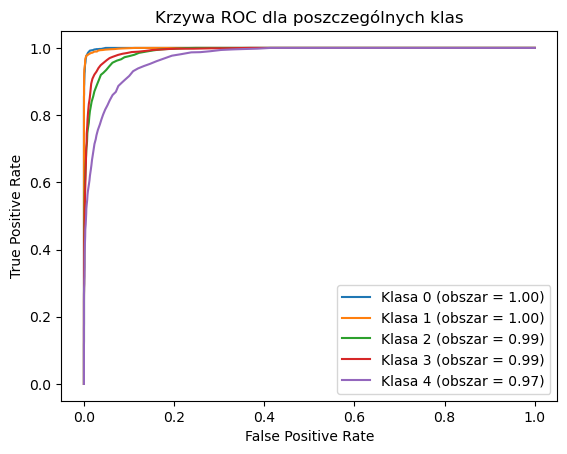

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarizacja etykiet
y = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y.shape[1]

# Predykcja prawdopodobieństw dla wszystkich klas
y_score = las.predict_proba(X_test)

# Obliczenie krzywej ROC i AUC dla każdej klasy
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Wyświetlenie krzywej ROC dla każdej klasy
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Klasa %d (obszar = %0.2f)' % (i, roc_auc[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC dla poszczególnych klas')
plt.legend(loc="lower right")
plt.show()